In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

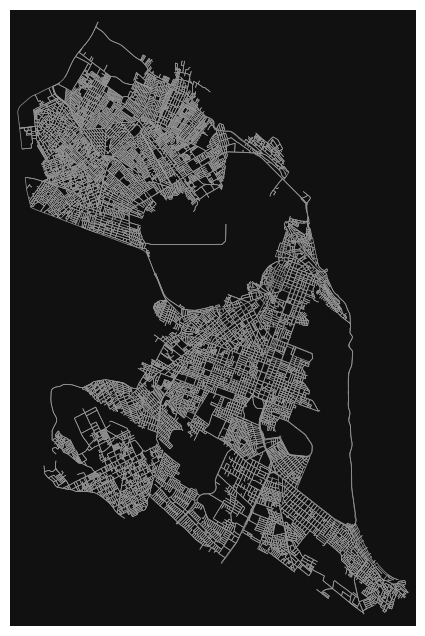

In [ ]:
# Create a graph from the road network of Natal, Rio Grande do Norte, Brazil
G = ox.graph_from_place("Natal, Rio Grande do Norte, Brasil", network_type="drive", simplify=True)

# Plot the graph with specified node size and edge linewidth
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5, show=False, close=False)

In [ ]:
#Adicione comentários em ingles
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"O número de nós em G é: {num_nodes}")
print(f"O número de arestas em G é: {num_edges}")

O número de nós em G é: 18668
O número de arestas em G é: 48524


In [ ]:
# Get the largest strongly connected component
strong_components = list(nx.strongly_connected_components(G))
largest_strong_component = max(strong_components, key=len)
G_largest = G.subgraph(largest_strong_component).copy()

# Calculate the average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G_largest, weight='length')

# Print the diameter of the graph
print(f"O Average Shortest Path Length de G é: {avg_shortest_path_length} metros")

O Average Shortest Path Length de G é: 10672.341083974647 metros


In [ ]:
# Calculate the diameter of the graph
diameter = nx.diameter(G_largest, weight='length')

# Print the diameter of the graph
print(f"O Diâmetro de G é: {diameter} metros")

O Diâmetro de G é: 30161.54899999998 metros


In [ ]:
# Define the coordinates of the starting point
latitude = -5.811551614738788
longitude = -35.21889920439562

# Find the nearest node to the starting point
start_node = ox.distance.nearest_nodes(G, X=longitude, Y=latitude)
print(f"Nó mais próximo das coordenadas iniciais: {start_node}")

# Calculate the distance to all other nodes from the starting node
lengths = nx.single_source_dijkstra_path_length(G, start_node, weight='length')

# Identify the farthest node and its distance
farthest_node = max(lengths, key=lengths.get)
max_distance = lengths[farthest_node]

# Print the farthest node and its distance
print(f"O ponto mais distante é o nó {farthest_node} a {max_distance:.2f} metros.")

# Check the longitude and latitude of the farthest node
farthest_node_coords = (G.nodes[farthest_node]['y'], G.nodes[farthest_node]['x'])
print(f"Coordenadas do nó mais distante: Latitude {farthest_node_coords[0]}, Longitude {farthest_node_coords[1]}")

Nó mais próximo das coordenadas iniciais: 529774086
O ponto mais distante é o nó 5624856493 a 16931.10 metros.
Coordenadas do nó mais distante: Latitude -5.704302, Longitude -35.265711


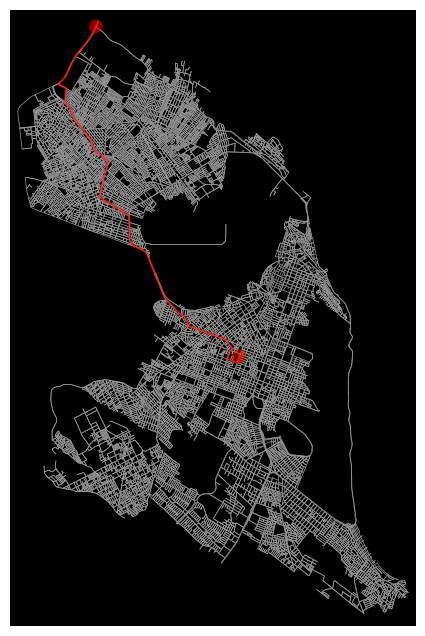

In [ ]:
# Calculate the shortest path from the starting node to the farthest node
shortest_path = nx.shortest_path(G, source=start_node, target=farthest_node, weight='length')

# Plot the graph with the shortest path highlighted
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=2, edge_linewidth=0.5, node_size=0, bgcolor='k')

In [ ]:
# Get the number of connected components in the undirected graph
num_components = nx.number_connected_components(G_undirected)
print(f"O grafo tem {num_components} componentes conectados.")

O grafo tem 1 componentes conectados.


In [ ]:
# Get the number of weakly and strongly connected components
num_weakly_connected_components = nx.number_weakly_connected_components(G)
print(f"O grafo tem {num_weakly_connected_components} componentes fracamente conectados.")

# Número de componentes fortemente conectados
num_strongly_connected_components = nx.number_strongly_connected_components(G)
print(f"O grafo tem {num_strongly_connected_components} componentes fortemente conectados.")


O grafo tem 1 componentes fracamente conectados.
O grafo tem 18 componentes fortemente conectados.


In [ ]:
# Get the largest connected component (Giant Connected Component)
G_undirected = G.to_undirected()
giant_connected_component = max(nx.connected_components(G_undirected), key=len)
G_gcc = G_undirected.subgraph(giant_connected_component).copy()

print(f"O número de nós na Giant Connected Component é: {G_gcc.number_of_nodes()}")
print(f"O número de arestas na Giant Connected Component é: {G_gcc.number_of_edges()}")

In [ ]:
# Convert G to a simple graph
G_simple = nx.Graph(G)

# Calculate the average clustering coefficient
clustering_coefficient = nx.average_clustering(G_simple)

# Print the clustering coefficient
print(f"O coeficiente de clustering de G é: {clustering_coefficient}")

O coeficiente de clustering de G é: 0.030735304621098494
